# Importing Files / Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder


In [3]:
data=pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.shape

(918, 12)

# Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data['HeartDisease'] = data['HeartDisease'].astype('category')
data['FastingBS'] = data['FastingBS'].astype('category')

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = data.select_dtypes(include=numerics).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [8]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

In [9]:
data.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [10]:
data.describe(include = ['object', 'category']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,1,508


In [11]:
corr_matrix = data.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


# Binary Features (3)

In [12]:
def pie_charts(data, feature, target):
    colors = sns.color_palette('pastel')[0:5]
    fig,axes = plt.subplots(1,2,figsize=(12,8))
    labels = data[feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(data[data[target]==0][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No {}'.format(target),fontsize=15)
    axes[1].pie(data[data[target]==1][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes {}'.format(target),fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15)
    plt.show()

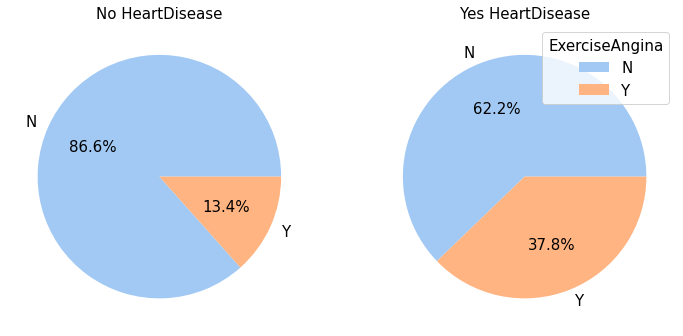

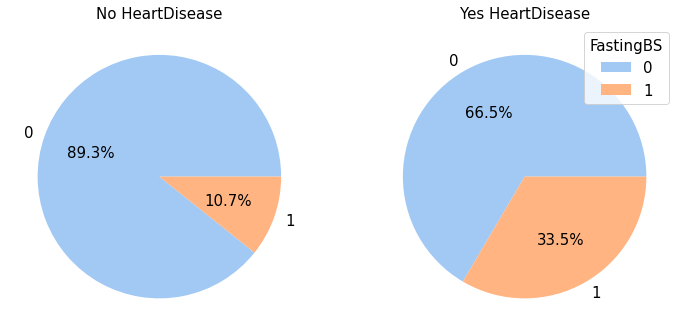

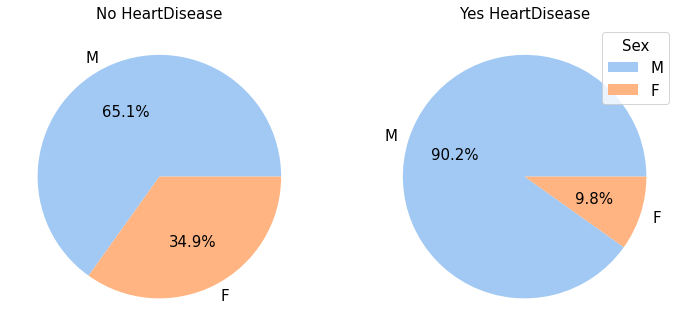

In [13]:
binary_feature = ["ExerciseAngina", "FastingBS", "Sex"]
for feature in binary_feature:
    pie_charts(data,feature,"HeartDisease")

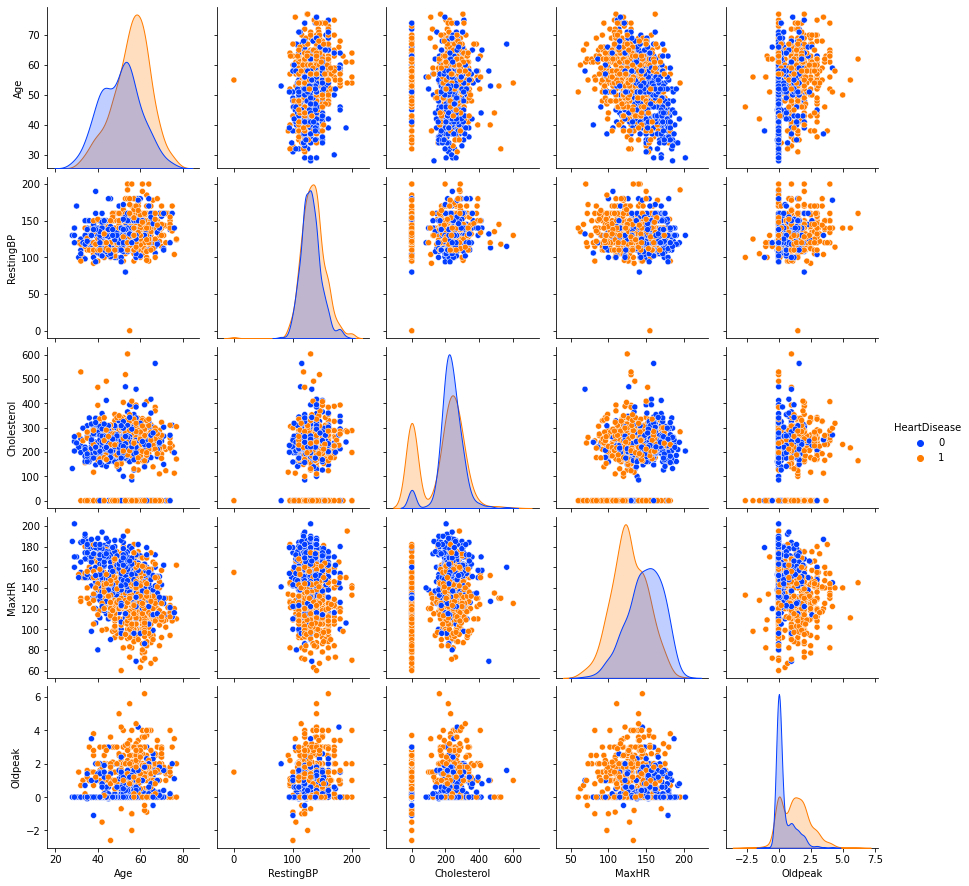

In [14]:
sns.pairplot(data,hue='HeartDisease',palette='bright')

In [15]:
def probability_calculation(feature, feature_values) : 
    
    first_with_heart_disease = len(data[(data['HeartDisease']==1) & (data[feature]==feature_values[0])])
    num_first_value = len(data[data[feature]==feature_values[0]])

    second_with_heart_disease = len(data[(data['HeartDisease']==1) & (data[feature]==feature_values[1])])
    num_second_value = len(data[data[feature]==feature_values[1]])

    print("\n" + feature + " : \n")
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[0]), first_with_heart_disease/num_first_value)
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[1]), second_with_heart_disease/num_second_value)


In [16]:
probability_calculation('Sex', ['M', 'F'])


Sex : 

👉 Probability of Sex : M to have Heart disease: 0.6317241379310344
👉 Probability of Sex : F to have Heart disease: 0.25906735751295334


In [17]:
probability_calculation('ExerciseAngina', ['Y', 'N'])


ExerciseAngina : 

👉 Probability of ExerciseAngina : Y to have Heart disease: 0.8517520215633423
👉 Probability of ExerciseAngina : N to have Heart disease: 0.3510054844606947


In [18]:
probability_calculation("FastingBS", [1,0])


FastingBS : 

👉 Probability of FastingBS : 1 to have Heart disease: 0.794392523364486
👉 Probability of FastingBS : 0 to have Heart disease: 0.48011363636363635


# Multi-class features (3)

In [19]:
def distribution_categorical_features(data, feature, target, colors) :
    sns.set(rc={'figure.figsize':(14,6)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data,palette=colors)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

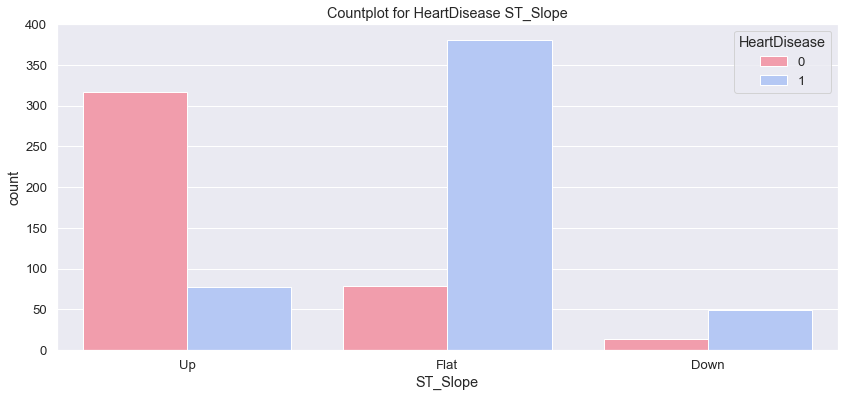

In [20]:
distribution_categorical_features(data, "ST_Slope", "HeartDisease", ["#ff8fa3","#abc4ff"])

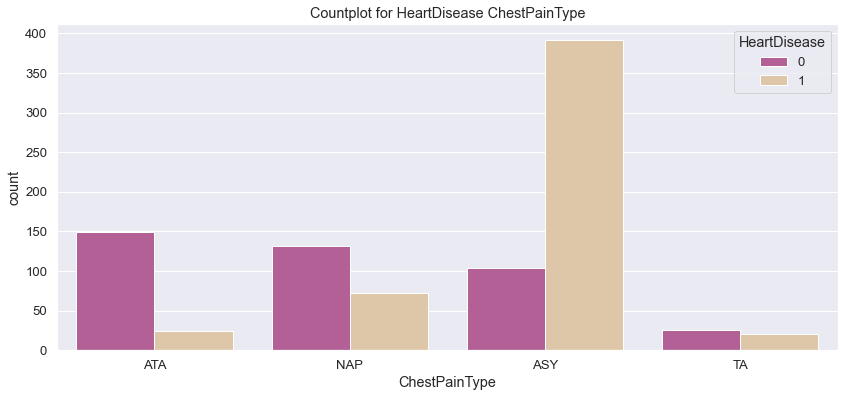

In [21]:
distribution_categorical_features(data, "ChestPainType", "HeartDisease", ["#c05299","#e7c8a0"])

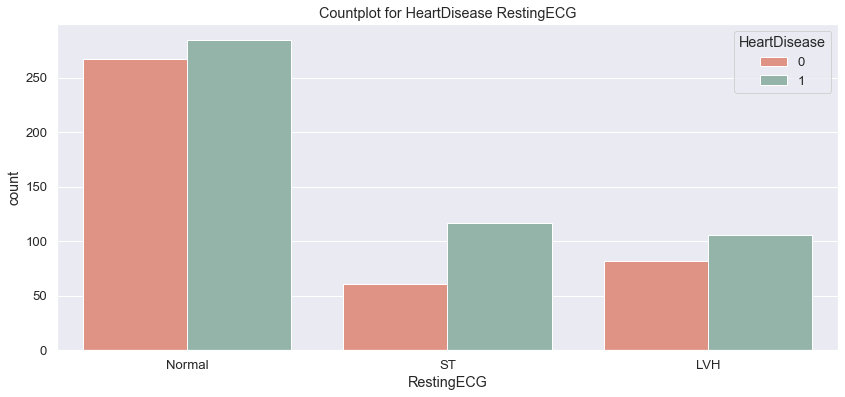

In [22]:
distribution_categorical_features(data, "RestingECG", "HeartDisease", ["#ED8975","#8FB9AA"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

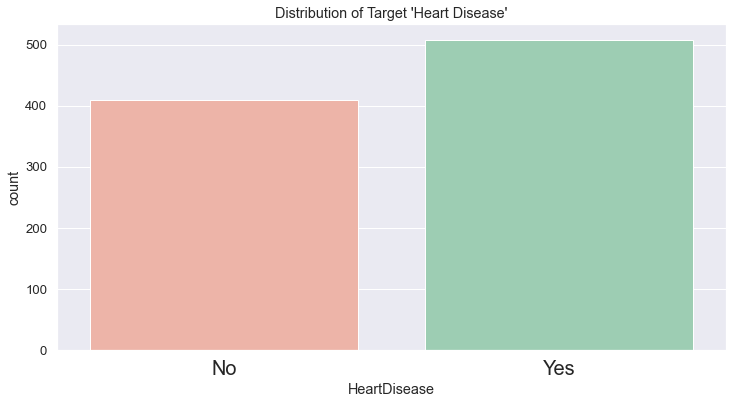

In [23]:
plt.figure(figsize=(12, 6))
heartDisease_countplot = sns.countplot(x=data.HeartDisease,palette=["#f8ad9d","#95d5b2"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)

# Numerical continous Features (5)

In [24]:
def kde_numerical_features(df,column, target) : 
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(df[df[target]==1][column], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
    sns.kdeplot(df[df[target]==0][column], alpha=0.5,shade = True, color="#fccc79", label="NoHeartDisease ", ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend()
    plt.show()

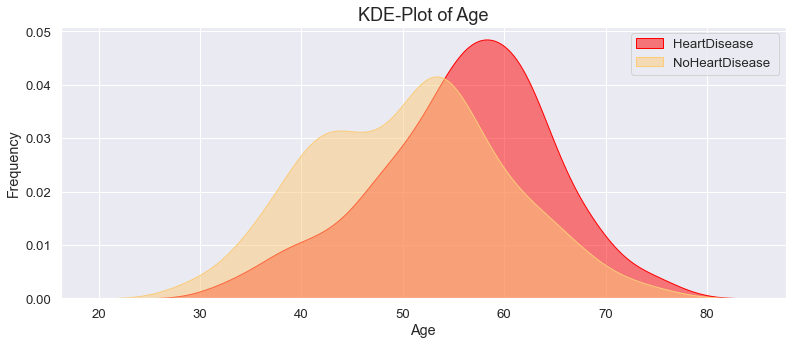

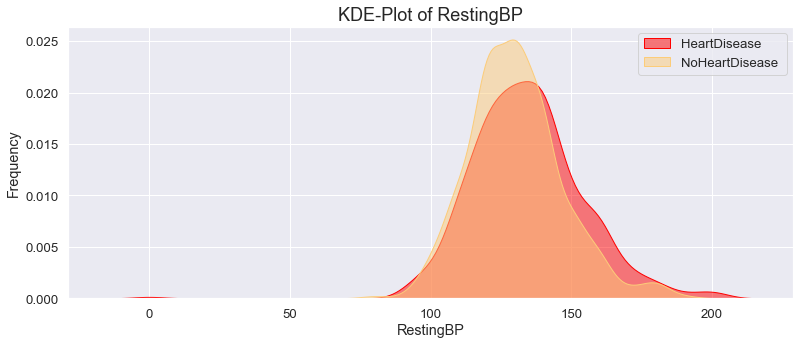

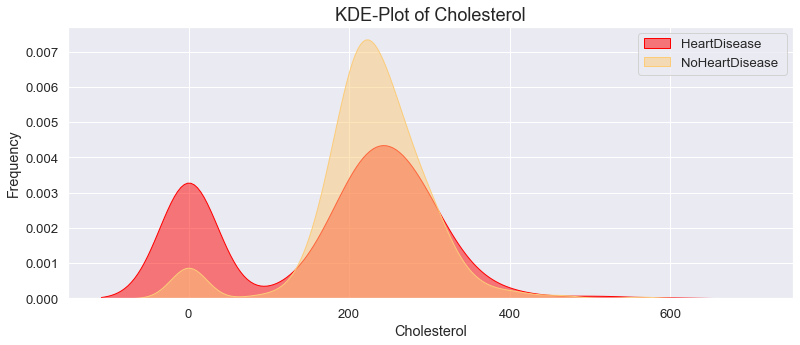

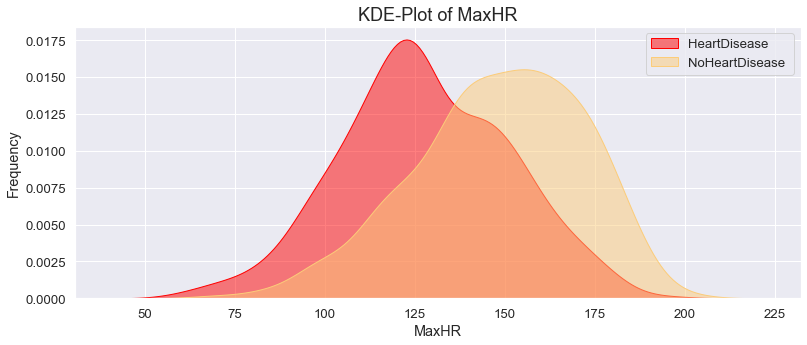

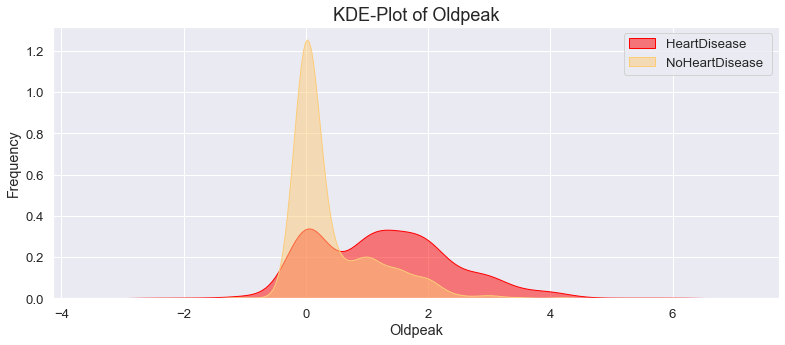

In [25]:
for column in numerical_columns : 
    kde_numerical_features(data,column, 'HeartDisease')

In [26]:
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']

def distribution_plot(column, title):

    fig = plt.figure(figsize=(16, 6))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)
    color = np.random.choice(colors, 1)[0]

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}')
    sns.histplot(column, ax=ax0, color=color)

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)

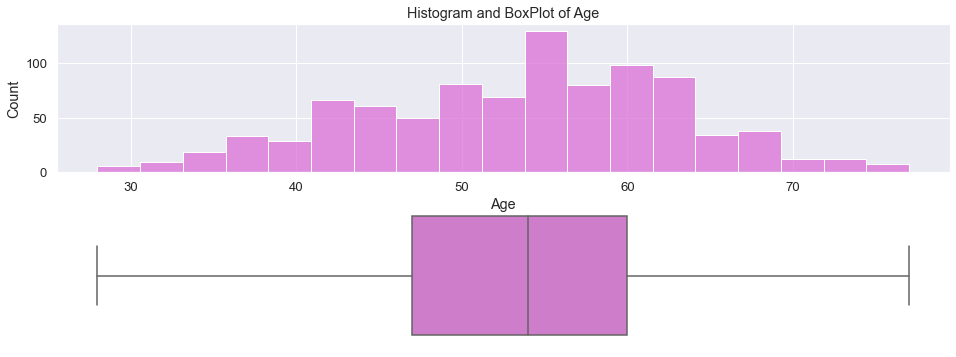

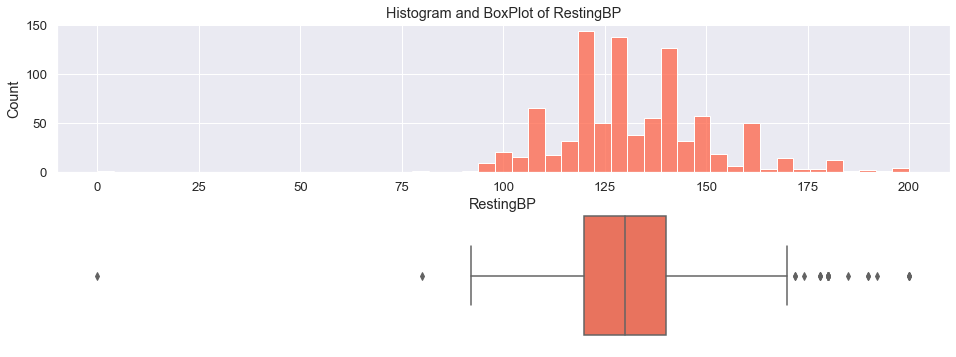

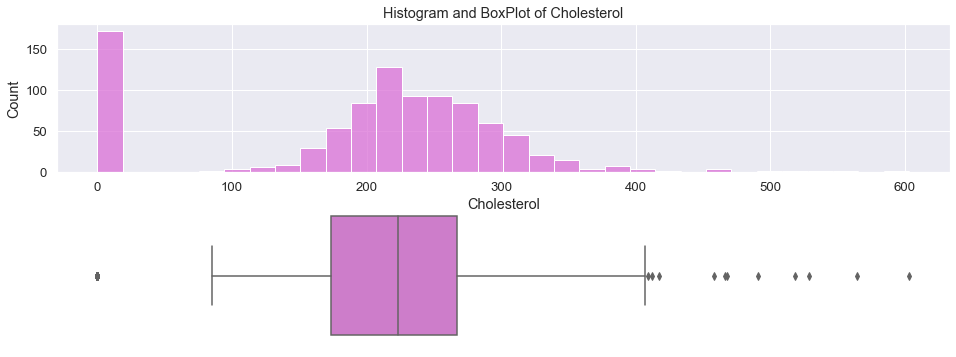

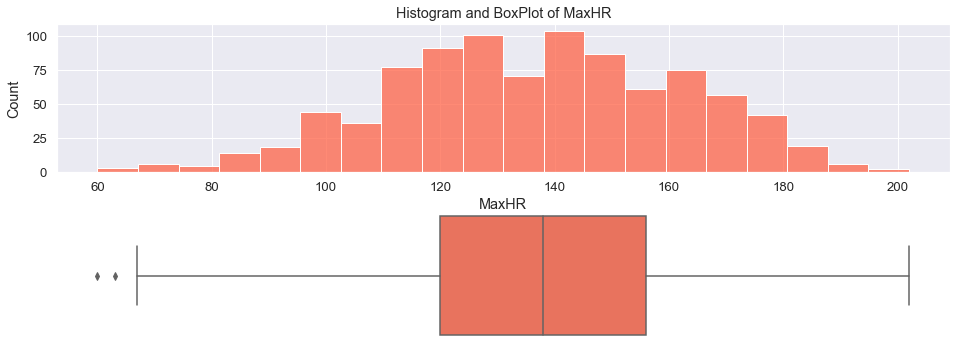

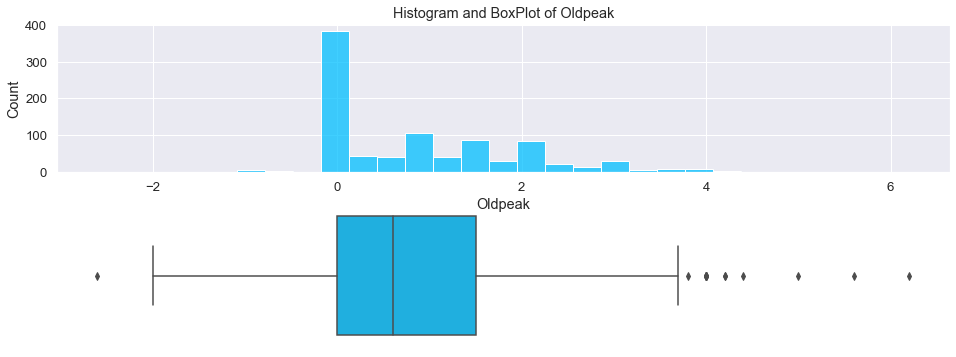

In [27]:
for col in numerical_columns:
    distribution_plot(data[col], col)

[Text(0.5, 1.0, 'All variables correlation heatmap')]

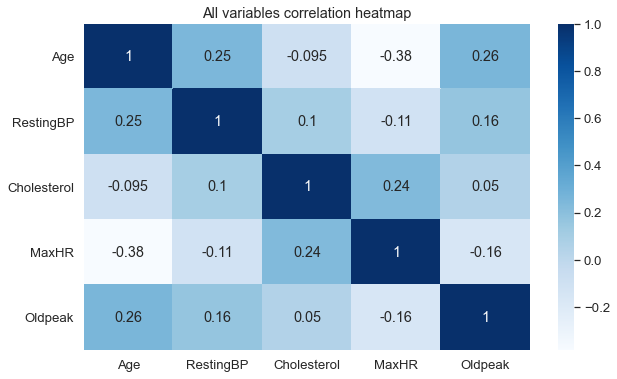

In [28]:
corr=data.corr()
plt.figure(figsize=(10, 6))
ax=sns.heatmap(corr,
            annot=True,cmap='Blues')
ax.set(title="All variables correlation heatmap")

# Pre-processing

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import set_config

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

features_num = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
features_cat = ["Sex", "ChestPainType", "RestingECG", 'FastingBS', "ExerciseAngina", "ST_Slope"]

transformer_num = make_pipeline(StandardScaler())
transformer_cat = make_pipeline(OneHotEncoder(handle_unknown='ignore'))

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

In [30]:
set_config(display = 'diagram')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR',
                                  'Oldpeak']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'FastingBS', 'ExerciseAngina', 'ST_Slope'])])

In [31]:
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, train_size=0.7)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
print(X_val.shape)

(276, 21)


In [68]:
type(X_train)

numpy.ndarray

# Modelling

In [33]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=150).fit(X_train, y_train)
y_pred_1=clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_1)

C:\Users\SAMKIT\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8442028985507246

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)
accuracy_score(y_val,y_pred)

0.8623188405797102

In [35]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)
accuracy_score(y_val,KNN.predict(X_val))

0.855072463768116

In [37]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
knn_gs = GridSearchCV(KNN, param_grid, n_jobs=-1, cv=3)
knn_gs.fit(X_train, y_train)
print('Best parameters found:\n', knn_gs.best_params_)
# accuracy_score(y_val,knn_gs.predict(X_val))

Best parameters found:
 {'n_neighbors': 7}


In [41]:
knn_best_para=KNeighborsClassifier(n_neighbors=7)
knn_best_para.fit(X_train, y_train)
accuracy_score(y_val,knn_best_para.predict(X_val))

0.8586956521739131

In [39]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score as acc
model_1 = MLPClassifier(max_iter=150, random_state=1)
model_1.fit(X_train,y_train)
y_pred_1=model_1.predict(X_val)
print(acc(y_pred_1,y_val))

0.8586956521739131


C:\Users\SAMKIT\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(model_1, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
model_1_bestpara= MLPClassifier(activation='relu', alpha= 0.05, hidden_layer_sizes= (100,), learning_rate= 'constant', solver= 'adam')
model_1_bestpara.fit(X_train,y_train)
y_pred_1=model_1_bestpara.predict(X_val)
print(acc(y_pred_1,y_val))

0.855072463768116


C:\Users\SAMKIT\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(X_train, y_train)
 
# print prediction results
predictions = model_2.predict(X_val)
print(acc(y_val, predictions))

0.8586956521739131


In [ ]:

from xgboost import XGBClassifier
model_3 = XGBClassifier(learning_rate=0.02, n_estimators=600)
model_3.fit(X_train,y_train)

print(acc(y_val,model_3.predict(X_val)))

C:\Users\SAMKIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8586956521739131


In [ ]:
params = {
        'learning_rate':[0.001,0.01,0.02,0.05,0.1,0.5,1],
        'n_estimators':[100,200,500,600,1000],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
model_3_bestpara = GridSearchCV(model_3, params, n_jobs=-1, cv=3)
model_3_bestpara.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

KeyboardInterrupt: 

In [ ]:
model_3_bestparam=XGBClassifier(colsample_bytree=0.6,gamma=1.5,max_depth=3,min_child_weight=1,subsample=0.6,learning_rate=0.02, n_estimators=600)
model_3_bestparam.fit(X_train, y_train)
print(acc(y_val,model_3_bestparam.predict(X_val)))

0.8514492753623188


In [64]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, y_train)
print(acc(y_val,gnb.predict(X_val)))

0.8478260869565217


In [65]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc=DTC()
dtc.fit(X_train, y_train)
print(acc(y_val,dtc.predict(X_val)))

0.8007246376811594


In [42]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
print(acc(y_val,rfc.predict(X_val)))

0.8586956521739131


In [43]:
from lightgbm import LGBMClassifier as lgb
kgb=lgb()
kgb.fit(X_train, y_train)
print(acc(y_val,kgb.predict(X_val)))

0.8405797101449275


Epoch: 1 | Loss: 0.6671 | Train Accuracy: 69.22
Epoch: 2 | Loss: 0.5965 | Train Accuracy: 82.34
Epoch: 3 | Loss: 0.5534 | Train Accuracy: 82.97
Epoch: 4 | Loss: 0.5277 | Train Accuracy: 83.28
Epoch: 5 | Loss: 0.5117 | Train Accuracy: 83.44
Epoch: 6 | Loss: 0.4992 | Train Accuracy: 83.91
Epoch: 7 | Loss: 0.4907 | Train Accuracy: 84.22
Epoch: 8 | Loss: 0.4840 | Train Accuracy: 84.53
Epoch: 9 | Loss: 0.4784 | Train Accuracy: 84.69
Epoch: 10 | Loss: 0.4759 | Train Accuracy: 85.00
Epoch: 11 | Loss: 0.4722 | Train Accuracy: 85.16
Epoch: 12 | Loss: 0.4694 | Train Accuracy: 85.31
Epoch: 13 | Loss: 0.4669 | Train Accuracy: 85.31
Epoch: 14 | Loss: 0.4645 | Train Accuracy: 85.62
Epoch: 15 | Loss: 0.4628 | Train Accuracy: 85.78
Epoch: 16 | Loss: 0.4611 | Train Accuracy: 85.47
Epoch: 17 | Loss: 0.4586 | Train Accuracy: 85.47
Epoch: 18 | Loss: 0.4575 | Train Accuracy: 85.78
Epoch: 19 | Loss: 0.4567 | Train Accuracy: 85.78
Epoch: 20 | Loss: 0.4553 | Train Accuracy: 85.62
Epoch: 21 | Loss: 0.4538 | Tr

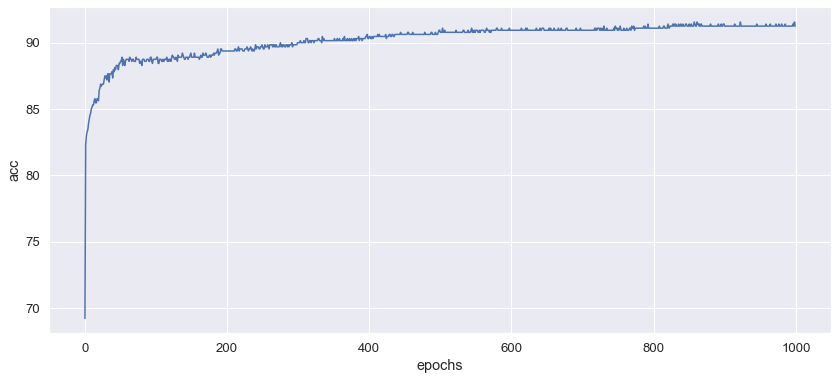

In [ ]:
import torch #python #keras #tensorflow #pytorch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.utils import shuffle

from math import e,sqrt,sin,cos


X_train_nn=np.array(X_train)
y_train_nn=np.array(y_train)
X_test_nn=np.array(X_val)
y_test_nn=np.array(y_val) 

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()


#Define training hyperprameters.
batch_size = 5 #sample batch
num_epochs = 1000 #number times dataset seen
learning_rate = 0.01
size_hidden_1 = 100 #neurons
size_hidden_2 = 100 #neurons
num_classes = 2

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train_nn) // batch_size  #batches
cols = X_train_nn.shape[1] #Number of columns in input matrix


#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, num_inputs, size_hidden_1, n_output):
        super(Net, self).__init__()
        self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
        self.activation_1 = torch.nn.Tanh() # activation layer
        self.hidden_layer_2 = torch.nn.Linear(num_inputs,size_hidden_1)   # hidden layer
        # self.activation_2 = torch.nn.ReLU() # activation layer
        
        self.output_layer = torch.nn.Linear(size_hidden_1, n_output)   # output layer
        self.output_act = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.activation_1(self.hidden_layer_1(x))  + self.activation_1(self.hidden_layer_2(x))    # activation function for hidden layer
        # x= self.activation_2(self.hidden_layer_2(x))      # activation function for hidden layer
        x = self.output_act(self.output_layer(x))                    # output
        return x

net = Net(cols, size_hidden_1, num_classes)
# summary(net, (1, 4))

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_func = torch.nn.CrossEntropyLoss()


ep=[]
accc=[]
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train_nn, y_train_nn = shuffle(X_train_nn, y_train_nn)

    train_acc = 0.0
    running_loss = 0.0

    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train_nn[start:end]))
        labels = Variable(torch.LongTensor(y_train_nn[start:end]))
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        # print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        #loss = criterion(outputs, torch.unsqueeze(labels, dim=1))
        loss = loss_func(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        acc = get_accuracy(outputs, labels, batch_size)
        train_acc += acc
      
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch+1, running_loss / (i+1), train_acc/(i+1)))  
    running_loss = 0.0
    ep.append(epoch)
    accc.append(train_acc/(i+1))

plt.plot(ep,accc)
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()



In [ ]:
acc = 0
batch_size = len(X_test_nn)
inputs = Variable(torch.FloatTensor(X_test_nn))
labels = Variable(torch.LongTensor(y_test_nn))

# zero the parameter gradients
optimizer.zero_grad()

# forward + backward + optimize
outputs = net(inputs)

#print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
#loss = criterion(outputs, torch.unsqueeze(labels, dim=1))

# print statistics
acc = get_accuracy(outputs, labels, batch_size)

print('Test Accuracy: %.2f' \
  %(acc)) 

Test Accuracy: 86.59


In [44]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score,roc_auc_score
lr=LR()
lr.fit(X_train, y_train)
print(roc_auc_score(y_val,lr.predict(X_val)))


0.8505428997232275


In [83]:
data2= pd.read_csv('heart.csv')
data2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

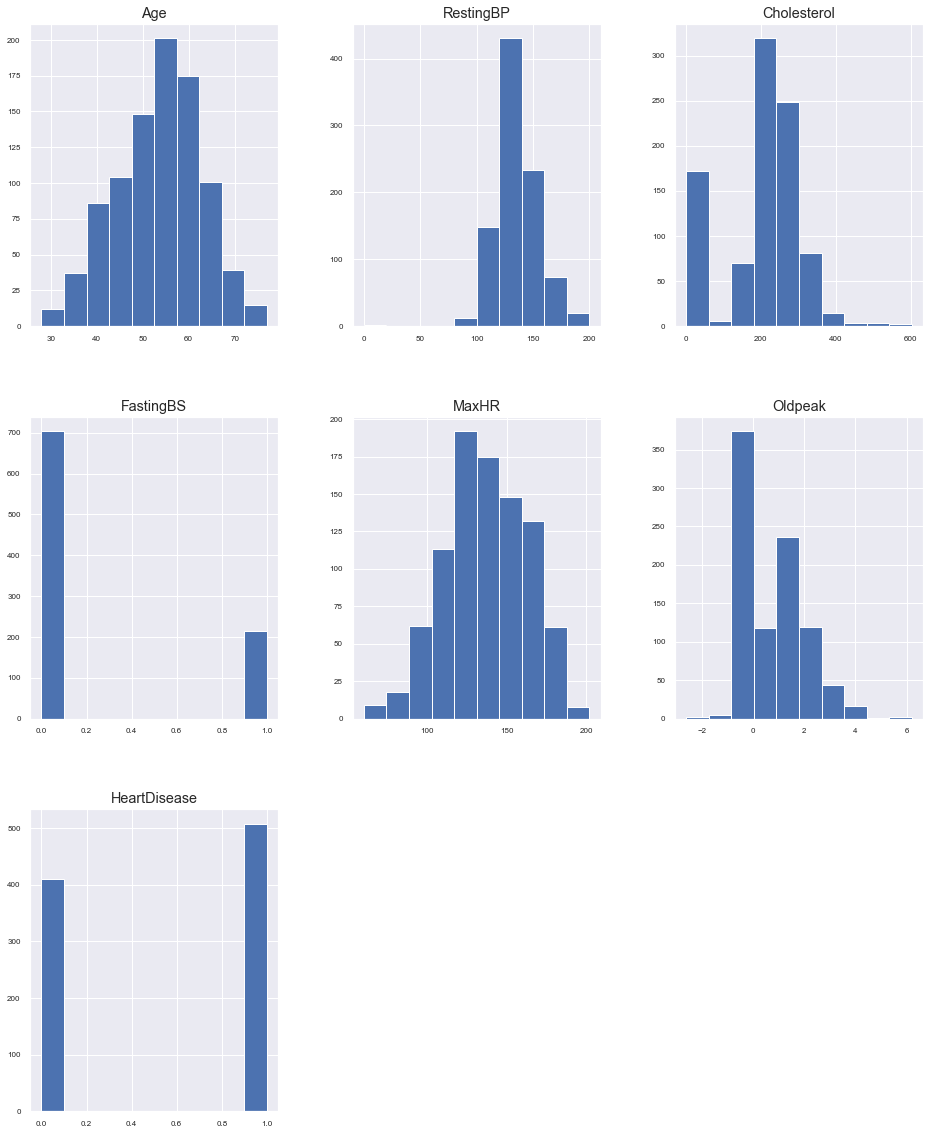

In [84]:
data2.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

C:\Users\SAMKIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


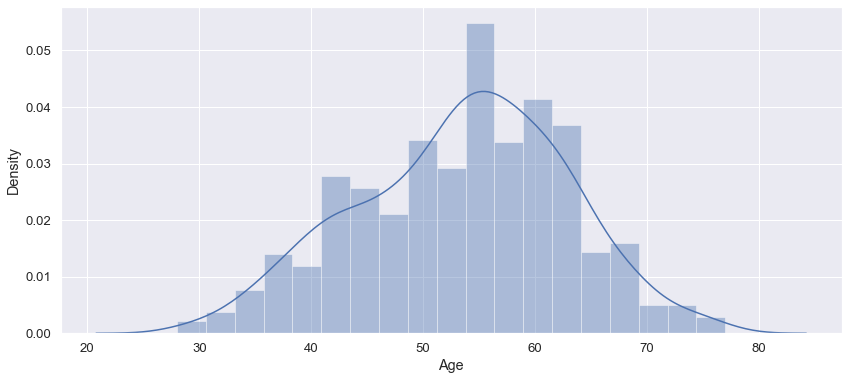

C:\Users\SAMKIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


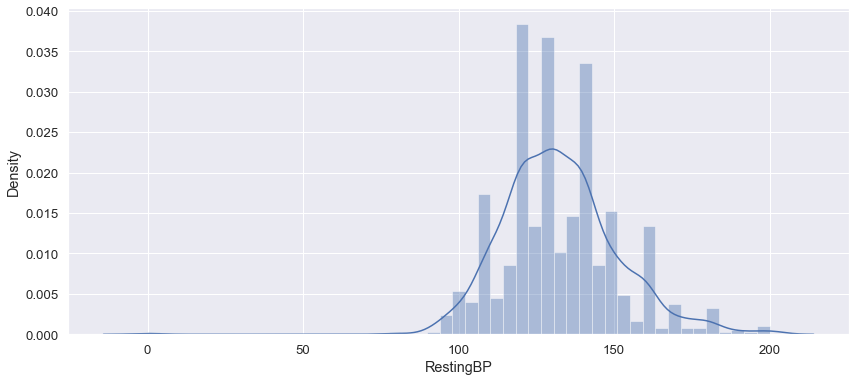

C:\Users\SAMKIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


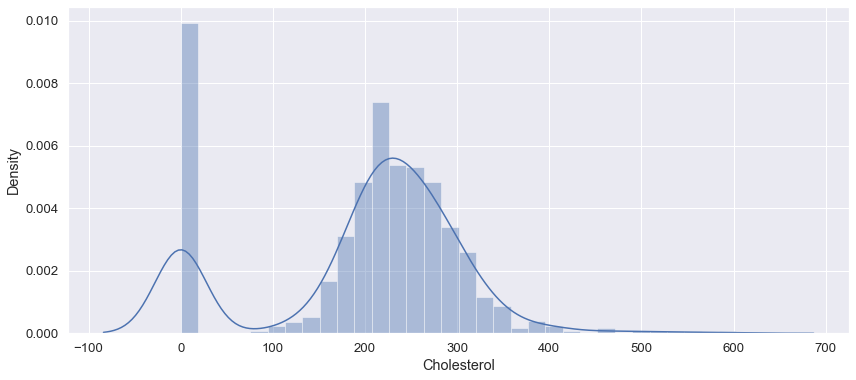

C:\Users\SAMKIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


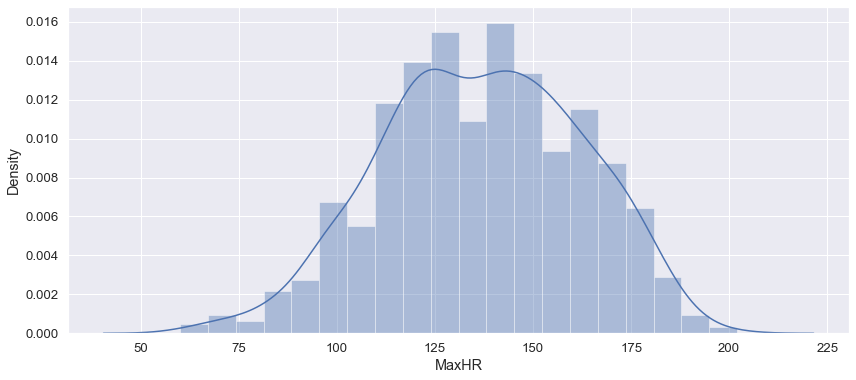

C:\Users\SAMKIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


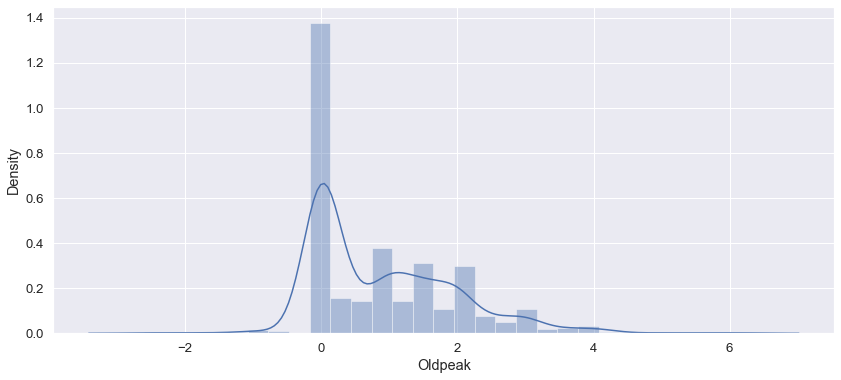

In [85]:
continuous_numeric_features = ['Age', 'RestingBP', 'Cholesterol','MaxHR','Oldpeak']
for feature in continuous_numeric_features:
    sns.distplot(data2[feature])
    plt.show()

In [86]:
from sklearn.preprocessing import LabelEncoder
target=['HeartDisease']
for i in data2.columns:
    if i not in continuous_numeric_features:
        if i not in target:
            data2[i]=LabelEncoder().fit_transform(data2[i])
# data2['species'] = LabelEncoder().fit_transform(data2['species'])
# data2['island'] = LabelEncoder().fit_transform(data2['island'])
# data2['year'] = LabelEncoder().fit_transform(data2['year'])
# data2['sex'] = LabelEncoder().fit_transform(data2['sex'])
data2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [88]:
def gini_calculation(Target_possible_labels,diff_labels_freq):
    value = 0
    div = sum(diff_labels_freq)
    for i in range(Target_possible_labels):
        k = 0
        k += diff_labels_freq[i]
        if(div != 0):
            k = k/div
        k = k*k
        value += k
    return 1 - value


def cont_to_cat(feature,Y,opt_threshold):
    Min_gini = 1
    Threshold = -1
    for temp_threshold in data2[feature]:
        temp = np.zeros((3,2),dtype = int)
        indices_tot = data2.index
        indices = indices_tot[data2[feature] >= temp_threshold]
        yes_tot = len(indices)
        no_tot = len(indices_tot) - len(indices)
        p1 = yes_tot/(yes_tot + no_tot)
        p2 = 1 - p1
        for i in indices:
            temp[Y[i]][1] += 1
        for i in indices_tot:
            if i not in indices:
                temp[Y[i]][0] += 1
        if(Min_gini > p1*gini_calculation(3,temp[:,1]) + p2*gini_calculation(3,temp[:,0])):
            Min_gini =  p1*gini_calculation(3,temp[:,1]) + p2*gini_calculation(3,temp[:,0])
            Threshold = temp_threshold
    opt_threshold.append(Threshold)
    for i in data2[feature]:
        if(i >= Threshold):
            data2[feature] = data2[feature].replace(i,'1')
        else:
            data2[feature] = data2[feature].replace(i,'0')

opt_thres = []
y=data2['HeartDisease']
# type(y)
for i in continuous_numeric_features:
    cont_to_cat(i,y,opt_thres)
# cont_to_cat('bill_length_mm',y,opt_thres)
# cont_to_cat('bill_depth_mm',y,opt_thres)
# cont_to_cat('flipper_length_mm',y,opt_thres)
# cont_to_cat('body_mass_g',y,opt_thres)
# best_thres = {}
# print(opt_thres)
# best_thres['bill_length_mm'] = opt_thres[0]
# best_thres['bill_depth_mm'] = opt_thres[1]
# best_thres['flipper_length_mm'] = opt_thres[2]
# best_thres['body_mass_g'] = opt_thres[3]
data2
#df_feature_level = df[df['elevation'] == level]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,1,1,0,1,0,1,1,0,0,2,0
1,0,0,2,1,1,0,1,1,0,1,1,1
2,0,1,1,0,1,0,2,0,0,0,2,0
3,0,0,0,0,1,0,1,0,1,1,1,1
4,0,1,2,1,1,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,3,0,1,0,1,0,0,1,1,1
914,1,1,0,1,1,1,1,1,0,1,1,1
915,1,1,0,0,1,0,1,0,1,1,1,1
916,1,0,1,0,1,0,0,1,0,0,1,1


In [89]:
x2=data2.drop(columns=target,axis=1)
y2=data2['HeartDisease']
X_train2, X_val2, y_train2, y_val2 = \
train_test_split(x2, y2, train_size=0.7)


In [91]:
rfc.fit(X_train2, y_train2)
print(acc(y_val2,rfc.predict(X_val2)))

TypeError: 'float' object is not callable

In [ ]:
gnb.fit(X_train2, y_train2)
print(acc(y_val2,gnb.predict(X_val2)))

TypeError: 'float' object is not callable

Epoch: 1 | Loss: 0.6572 | Train Accuracy: 70.94
Epoch: 2 | Loss: 0.6071 | Train Accuracy: 82.03
Epoch: 3 | Loss: 0.5729 | Train Accuracy: 83.44
Epoch: 4 | Loss: 0.5490 | Train Accuracy: 83.28
Epoch: 5 | Loss: 0.5333 | Train Accuracy: 83.12
Epoch: 6 | Loss: 0.5224 | Train Accuracy: 83.28
Epoch: 7 | Loss: 0.5133 | Train Accuracy: 83.59
Epoch: 8 | Loss: 0.5069 | Train Accuracy: 83.44
Epoch: 9 | Loss: 0.5019 | Train Accuracy: 83.44
Epoch: 10 | Loss: 0.4976 | Train Accuracy: 83.59
Epoch: 11 | Loss: 0.4938 | Train Accuracy: 83.75
Epoch: 12 | Loss: 0.4898 | Train Accuracy: 84.06
Epoch: 13 | Loss: 0.4880 | Train Accuracy: 83.59
Epoch: 14 | Loss: 0.4861 | Train Accuracy: 83.59
Epoch: 15 | Loss: 0.4823 | Train Accuracy: 83.91
Epoch: 16 | Loss: 0.4822 | Train Accuracy: 83.75
Epoch: 17 | Loss: 0.4807 | Train Accuracy: 83.59
Epoch: 18 | Loss: 0.4788 | Train Accuracy: 84.06
Epoch: 19 | Loss: 0.4776 | Train Accuracy: 83.91
Epoch: 20 | Loss: 0.4753 | Train Accuracy: 84.22
Epoch: 21 | Loss: 0.4753 | Tr

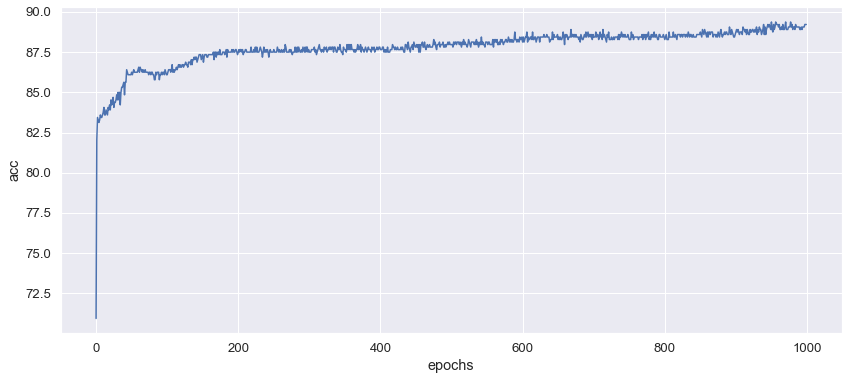

In [ ]:
import torch #python #keras #tensorflow #pytorch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.utils import shuffle

from math import e,sqrt,sin,cos

#Change to numpy arraay. 
X_train_nn=np.asarray(X_train2, dtype = float)
X_test_nn=np.asarray(X_val2, dtype = float)
y_train_nn=np.asarray(y_train2, dtype = int)
y_test_nn=np.asarray(y_val2, dtype = int)
# X_train_nn=np.array(X_train2).values
# y_train_nn=np.array(y_train2).values
# X_test_nn=np.array(X_val2)
# y_test_nn=np.array(y_val2) 

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()


#Define training hyperprameters.
batch_size = 5 #sample batch
num_epochs = 1000 #number times dataset seen
learning_rate = 0.01
size_hidden_1 = 100 #neurons
size_hidden_2 = 100 #neurons
num_classes = 2

#Calculate some other hyperparameters based on data.  
batch_no = len(X_train_nn) // batch_size  #batches
cols = X_train_nn.shape[1] #Number of columns in input matrix


#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, num_inputs, size_hidden_1, n_output):
        super(Net, self).__init__()
        self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
        self.activation_1 = torch.nn.Tanh() # activation layer
        self.hidden_layer_2 = torch.nn.Linear(num_inputs,size_hidden_1)   # hidden layer
        # self.activation_2 = torch.nn.ReLU() # activation layer
        
        self.output_layer = torch.nn.Linear(size_hidden_1, n_output)   # output layer
        self.output_act = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.activation_1(self.hidden_layer_1(x))  + self.activation_1(self.hidden_layer_2(x))    # activation function for hidden layer
        # x= self.activation_2(self.hidden_layer_2(x))      # activation function for hidden layer
        x = self.output_act(self.output_layer(x))                    # output
        return x

net = Net(cols, size_hidden_1, num_classes)
# summary(net, (1, 4))

optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_func = torch.nn.CrossEntropyLoss()


ep=[]
accc=[]
for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train_nn, y_train_nn = shuffle(X_train_nn, y_train_nn)

    train_acc = 0.0
    running_loss = 0.0

    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train_nn[start:end]))
        labels = Variable(torch.LongTensor(y_train_nn[start:end]))
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        # print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        #loss = criterion(outputs, torch.unsqueeze(labels, dim=1))
        loss = loss_func(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        acc = get_accuracy(outputs, labels, batch_size)
        train_acc += acc
      
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch+1, running_loss / (i+1), train_acc/(i+1)))  
    running_loss = 0.0
    ep.append(epoch)
    accc.append(train_acc/(i+1))

plt.plot(ep,accc)
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()



In [ ]:
acc = 0
batch_size = len(X_test_nn)
inputs = Variable(torch.FloatTensor(X_test_nn))
labels = Variable(torch.LongTensor(y_test_nn))

# zero the parameter gradients
optimizer.zero_grad()

# forward + backward + optimize
outputs = net(inputs)

#print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
#loss = criterion(outputs, torch.unsqueeze(labels, dim=1))

# print statistics
acc = get_accuracy(outputs, labels, batch_size)

print('Test Accuracy: %.2f' \
  %(acc)) 

Test Accuracy: 87.68
